## Performing linear least squares fitting

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [7]:
#random number seed
np.random.seed(119)

#set number of data points
npoint=50

#set x
x=np.linspace(0,10.0,npoint)

#slope,interecpt, and scatter rms
m = 2.0
b=1.0
sigma=2.0

#genrate y point
y=m*x +b+np.random.normal(scale=sigma,size=npoint)
y_err=np.full(npoint,sigma)

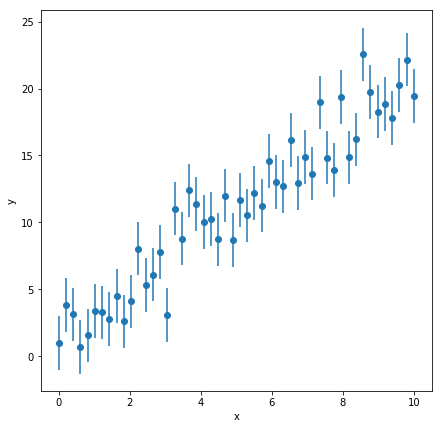

In [14]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,sigma,fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Method #1: polyfit(_)

In [21]:
m_fit,b_fit=np.poly1d(np.polyfit(x,y,1,w=1/y_err)) #Weight with uncertainties
print(m_fit,b_fit)

y_fit = m_fit *x +b_fit

1.9634043470399505 1.283010681296193


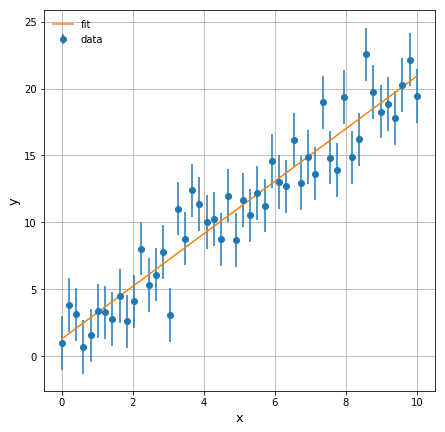

In [31]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x',fontsize=13)
plt.ylabel('y',fontsize=13)
plt.grid()
plt.legend(loc=2,frameon=False)
plt.show()

### Method #2: scipy + optimize

In [34]:
from scipy import optimize

#define the function of fit
def f_line(x,m,b):
    return m*x +b

#perfrom the fit
params,params_cov = optimize.curve_fit(f_line,x,y,sigma=y_err)

m_fit = params[0]
b_fit = params[1]
print(m_fit,b_fit)

1.9634043457508432 1.2830106890542259


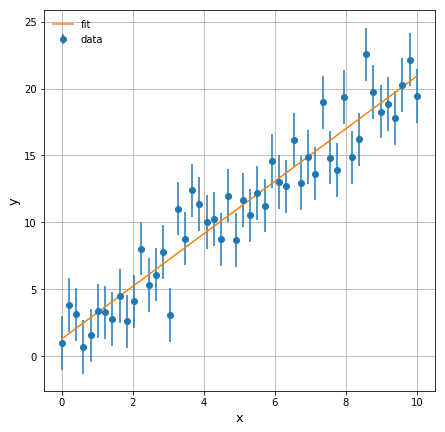

In [35]:
f = plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o',label='data')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x',fontsize=13)
plt.ylabel('y',fontsize=13)
plt.grid()
plt.legend(loc=2,frameon=False)
plt.show()

### Other complicated fits

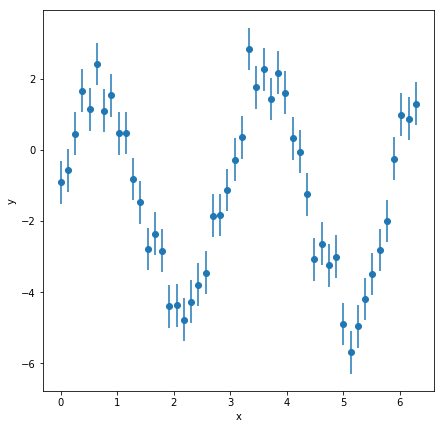

In [47]:
#redeine x and y
npoints = 50
x = np.linspace(0.,2*np.pi,npoints)

a = 3.4
b=2.1
c= 0.27
d= -1.3
sig =0.6
y =a*np.sin(b*x+c)+d+np.random.normal(scale=sig,size=npoints)
y_err=np.full(npoints,sig)

f=plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.show()

### scipy.optimize.curve_fit(_)

In [48]:
from scipy import optimize

def f_line(x,a,b,c,d):
    return a * np.sin(b*x+c)+d

params, params_con = optimize.curve_fit(f_line,x,y,sigma=y_err,p0=[1,2.,0.1,-0.1])

a_fit = params[0]
b_fit = params[1]
c_fit = params[2]
d_fit = params[3]

print(a_fit,b_fit,d_fit)

y_fit=a_fit * np.sin(b_fit*x+c_fit) + d_fit

3.2867841022109543 2.1352564238100458 -1.297465233050674


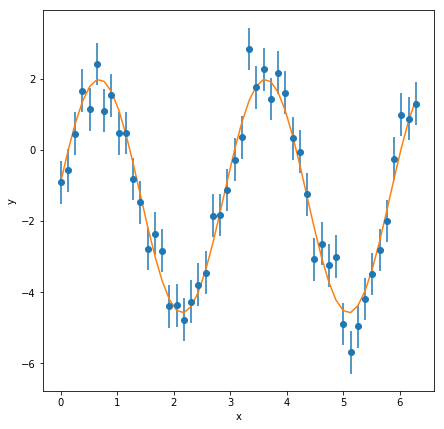

In [49]:
f=plt.figure(figsize=(7,7))
plt.errorbar(x,y,yerr=y_err,fmt='o')
plt.plot(x,y_fit,label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
plt.show()